In [32]:
from typing import TypedDict, List, Dict
import random
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

In [33]:
class AgentState(TypedDict):
    name: str
    number: int
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int

In [34]:
def setup_game(state:AgentState) -> AgentState:
    state['guesses'] = []
    state['attempts'] = 0
    state['lower_bound'] = 1
    state['upper_bound'] = 100
    state['number'] = random.randint(state['lower_bound'], state['upper_bound'])
    print(f"Welcome {state['name']}! I have selected a number between {state['lower_bound']} and {state['upper_bound']}.")
    return state

def make_guess(state: AgentState) -> AgentState:
    guess = random.randint(state['lower_bound'], state['upper_bound'])
    # guess = int(input(f"Make a guess between {state['lower_bound']} and {state['upper_bound']}: "))
    state['guesses'].append(guess)
    state['attempts'] += 1

    if guess < state['lower_bound'] or guess > state['upper_bound']:
        print("Your guess is out of bounds. Try again.")
    elif guess < state['number']:
        print("Too low! Try again.")
        state['lower_bound'] = max(state['lower_bound'], guess + 1)
    elif guess > state['number']:
        print("Too high! Try again.")
        state['upper_bound'] = min(state['upper_bound'], guess - 1)
    else:
        print(f"Congratulations {state['name']}! You've guessed the number {state['number']} in {state['attempts']} attempts.")
        return END
    print(f"Your guess: {guess}")
    print(state)
    return state

def stop_condition(state: AgentState) -> AgentState:
    if state['attempts'] >= 7:
        print(f"Sorry {state['name']}, you've used all your attempts! The number was {state['number']}.")
        return "end"
    else:
        return "continue"

def final_node(state: AgentState) -> AgentState:
    if state['attempts'] < 7:
        print(f"Great job {state['name']}! You guessed the number {state['number']} in {state['attempts']} attempts.")
        print(f"Your guesses were: {state['guesses']}")
        print("Thanks for playing!")
    else:
        print(f"Better luck next time, {state['name']}! The number was {state['number']}.")
    return state

In [35]:
graph = StateGraph(AgentState)

graph.add_node("setup_game", setup_game)
graph.add_node("make_guess", make_guess)
graph.add_node("final_node", final_node)

graph.add_edge(START, "setup_game")
graph.add_edge("setup_game", "make_guess")
graph.add_conditional_edges(
    "make_guess", 
    stop_condition,
    {
        "continue": "make_guess",
        "end": "final_node",
    },
)
graph.add_edge("final_node", END)

app = graph.compile()

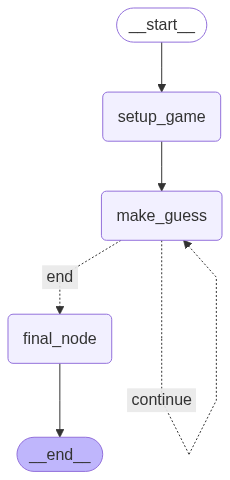

In [36]:
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph as an image

In [37]:
result = app.invoke({"name": "Player","lower_bound": 1, "upper_bound": 100})
print(result)  # Print the final state after the game ends

Welcome Player! I have selected a number between 1 and 100.
Too high! Try again.
Your guess: 88
{'name': 'Player', 'number': 69, 'guesses': [88], 'attempts': 1, 'lower_bound': 1, 'upper_bound': 87}
Too low! Try again.
Your guess: 64
{'name': 'Player', 'number': 69, 'guesses': [88, 64], 'attempts': 2, 'lower_bound': 65, 'upper_bound': 87}
Too high! Try again.
Your guess: 86
{'name': 'Player', 'number': 69, 'guesses': [88, 64, 86], 'attempts': 3, 'lower_bound': 65, 'upper_bound': 85}
Too high! Try again.
Your guess: 73
{'name': 'Player', 'number': 69, 'guesses': [88, 64, 86, 73], 'attempts': 4, 'lower_bound': 65, 'upper_bound': 72}
Too low! Try again.
Your guess: 66
{'name': 'Player', 'number': 69, 'guesses': [88, 64, 86, 73, 66], 'attempts': 5, 'lower_bound': 67, 'upper_bound': 72}
Too high! Try again.
Your guess: 72
{'name': 'Player', 'number': 69, 'guesses': [88, 64, 86, 73, 66, 72], 'attempts': 6, 'lower_bound': 67, 'upper_bound': 71}
Too low! Try again.
Your guess: 68
{'name': 'Play